In [1]:
from src import demo
from src.utils import *
import numpy as np
import pandas as pd
from goatools import obo_parser
from goatools.gosubdag.gosubdag import GoSubDag
import copy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Figure 3.A

In [2]:
nt = demo.tissue_obj_multiplex_network(collection = "CC_ImmuneSig", labels = None, folder = 'data/GO_CC_ImmuneSig')
nt.load_Jaccard(self_loop = True)
nt.call_adj_filter_tr(q = None, tr = 0.2)

Computing the Jaccard coefficient similarity matrix ...


In [3]:
cell_label = copy.deepcopy(nt.layer_ns)
cell_label.insert(0, 'Jaccard')
nt.community_detection_MVP_per_layer(MVP_para = {'weights': "weight", 'n_iterations':-1, 'seed':123}, Jaccard = True)
nt.NMI_layers()
layer_similarity = nt.multiplex_property['inter-layer similarity']

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.50s/it]


In [4]:
print(cell_label)

['Jaccard', 'Trm', 'Tnaive', 'NK', 'Alveolar macrophages', 'Memory B cells']


In [5]:
label_lst = ['Jaccard', 'resident memory T cell', 'naive T cell', \
             'natural killer cell', 'alveolar macrophage', 'memory B cell']

In [6]:
g = visualization.vis_clustermap(sim_mat = layer_similarity, figsize=(12,10), label_lst = label_lst, cbar_kws ={"label":"NMI", "shrink":1}, dendro_mov = (-0.28, 0),\
                    row = True, cbar_pos = (1 ,0.65, 0.04,0.11),\
                  fontsize = 18, tick_rotation = 25, title = "Layers in the multiplex network", title_font_size = 20)

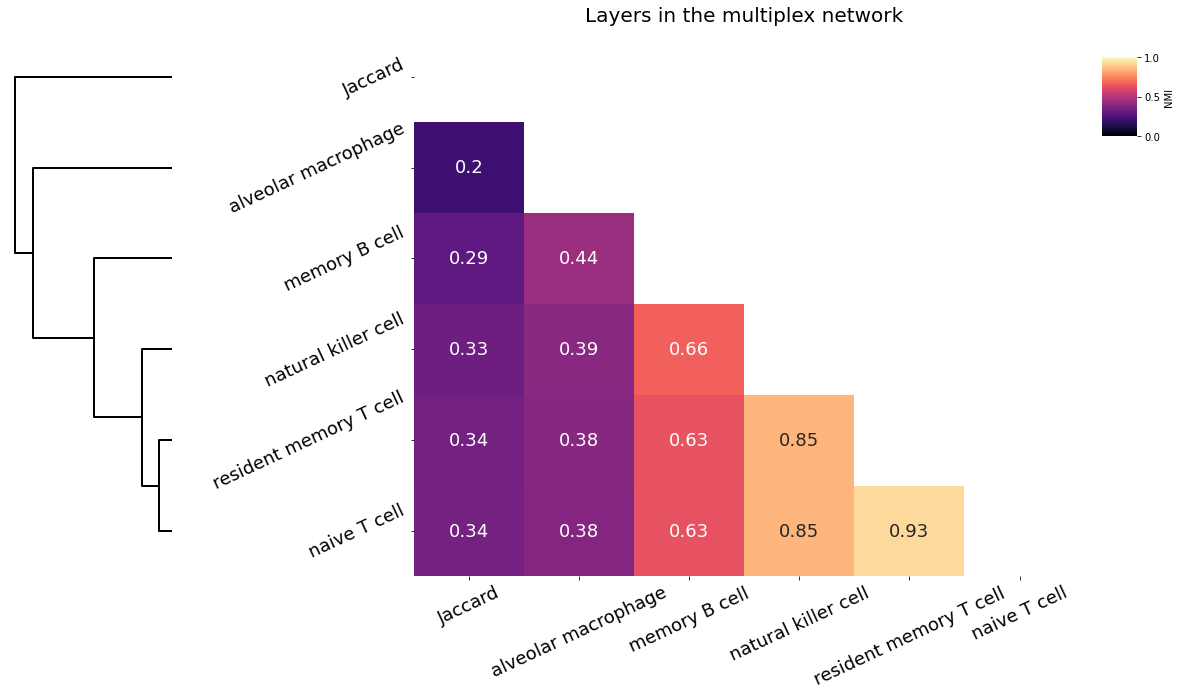

In [7]:
### the values shown here may be slightly different from the figure in the paper
g.figure

$~$

### Figure 3.C-D

create R_vis_GO_CC_ImmuneSig.csv (a file that stores the UMAP coordinates of gene sets; it also contains metadata)

In [8]:
### Modularity Vertex Partition, mininal size of a cluster is set to be 200.
# nt.community_detection_MVP(min_cluster = 200, MVP_para = {'weights': "weight", 'n_iterations':-1, 'seed':123})
# _, vis_lst = visualization.vis_multiplex_network(nt, display_feature = 'membership', title_size = 18,\
#                           para_vis_UMAP = { 'para_UMAP': {'random_state':111, 'n_neighbors':50}, \
#              'para_plot' : {'figsize':(8,5), 'dpi':100, 'cmap':'Spectral', 'alpha':0.8}, 
#              'colorbar_kw' : {'colorbar':True, 'anchor':(0, 0.4), 'location':'right'} })

In [9]:
# def name_to_color(n):
#     if n == "GO-CC":
#         return "orangered"
#     elif n == "ImmuneSig":
#         return "lightgrey"
#     else:
#         return None

# gs_cat = ['GO-CC' for i in range(1973)] + ['ImmuneSig' for i in range(4872)]

# col = list(map(name_to_color, np.array(gs_cat)[nt.common_gs_index]))

In [10]:
# _, _  = visualization.vis_multiplex_network(nt, UMAP_coord = vis_lst, title_lst = label_lst, title_size = 18, display_feature = [col for i in range(6)], \
#                           para_vis_UMAP = { 'para_UMAP': {'random_state':321, 'n_neighbors':15, 'min_dist':0.6}, \
#              'para_plot' : {'figsize':(8,5), 'dpi':100, 'cmap':'Spectral', 'alpha':0.15}, 
#              'colorbar_kw' : {'colorbar':False, 'anchor':(0, 0.4), 'location':'right'} })

In [11]:
# df_vis_dict = {}
# for i in range(len(vis_lst)):
#     temp = vis_lst[i].iloc[:,:2]
#     for j in range(2):
#         df_vis_dict[f'{label_lst[i]}_{j}'] = temp.iloc[:,j]
# df_vis = pd.DataFrame(df_vis_dict)
# df_vis['Description'] =  nt.gs_names

In [12]:
# col = [matplotlib.colors.cnames[item] for item in col]
# df_vis['gene.set'] = np.array(gs_cat)[nt.common_gs_index]
# df_vis['gene.set.color'] = col 
# df_vis.to_csv('R_vis_GO_CC_ImmuneSig.csv', sep = ',', header = True)

load R_vis_GO_CC_ImmuneSig.csv

In [13]:
vis_GO_CC_ImmuneSig = pd.read_csv('data/R_vis_GO_CC_ImmuneSig.csv', sep = ',')
vis_GO_CC = vis_GO_CC_ImmuneSig.loc[vis_GO_CC_ImmuneSig['Gene.set'] == 'GO-CC', :]
nt = demo.tissue_obj_multiplex_network(collection = "CC_ImmuneSig", labels = None, folder = 'data/GO_CC_ImmuneSig')
nt.load_Jaccard(self_loop = True)
nt.call_adj_filter_tr(q = None, tr = 0.1)
go = obo_parser.GODag("data/go-basic.obo")
go_sub_bp = GoSubDag(set(vis_GO_CC['ID']), go)

Computing the Jaccard coefficient similarity matrix ...
data/go-basic.obo: fmt(1.2) rel(2023-07-27) 46,356 Terms
45 GO IDs NOT FOUND IN GO DAG: GO:0031306 GO:0098945 GO:0071556 GO:0099059 GO:0098563 GO:0099060 GO:0046658 GO:0031228 GO:0031300 GO:0031233 GO:0099055 GO:0032592 GO:0099699 GO:0005779 GO:0098573 GO:0030285 GO:0099144 GO:0098948 GO:0031225 GO:0099146 GO:0031305 GO:0030173 GO:0031301 GO:0099240 GO:0031362 GO:0099056 GO:0031229 GO:0031231 GO:0089717 GO:0044214 GO:0031235 GO:0031166 GO:0031226 GO:0099061 GO:0044815 GO:0031310 GO:0098889 GO:0005639 GO:0031307 GO:1905103 GO:0098993 GO:0031227 GO:0030176 GO:0031304 GO:0098936
 GoSubDag: 749 sources in 778 GOs rcnt(True). 2 alt GO IDs
 GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 id
 GoSubDag: relationships: set()


In [14]:
levels = list(map(lambda t: t[1].level, go_sub_bp.go2obj.items()))
go_sub_ID = list(map(lambda t: t[1].id, go_sub_bp.go2obj.items()))
def find_pos(sub_ID, go_ID):
    if sub_ID in go_ID:
        return np.where(sub_ID == go_ID)[0][0]
    else:
        return None
pos = [find_pos(item, np.array(vis_GO_CC['ID'])) for item in go_sub_ID]

In [15]:
vis_GO_CC['levels'] = np.array(np.repeat(np.NaN, vis_GO_CC.shape[0]))
for p, l in zip(pos, levels):
    if p is not None:
        vis_GO_CC['levels'][p] = l
np.unique( vis_GO_CC['levels'], return_counts = True)

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan]),
 array([132, 171, 172, 137,  72,  28,  18,  16,   1,  47]))

In [16]:
w, root_ID, descendent = func.GO_hierarchy_variation_detection(nt, go = go, GO_ID = vis_GO_CC['ID'], GO_level = vis_GO_CC['levels'], \
                                     level = 3, num_core = 5)

In [17]:
vec_between_subtree = np.sum(np.nan_to_num(w, nan = 1) - np.diag(np.diag(np.nan_to_num(w, nan = 1), k = 0)), axis = 1)/(w.shape[0]-1)
vec_within_subtree = np.diag(np.nan_to_num(w, nan = 1))
ratio = vec_between_subtree/vec_within_subtree
for i in np.where(ratio > np.quantile(ratio, 0.9))[0]:
    print(f'{i}:', go[list(root_ID)[i]])

8: GO:0005681	level-03	depth-03	spliceosomal complex [cellular_component]
33: GO:0031967	level-03	depth-03	organelle envelope [cellular_component]
40: GO:0035770	level-03	depth-05	ribonucleoprotein granule [cellular_component]
44: GO:0045202	level-03	depth-03	synapse [cellular_component]
48: GO:0070161	level-03	depth-03	anchoring junction [cellular_component]
57: GO:0098590	level-03	depth-03	plasma membrane region [cellular_component]
66: GO:0099081	level-03	depth-03	supramolecular polymer [cellular_component]
69: GO:0099572	level-03	depth-03	postsynaptic specialization [cellular_component]


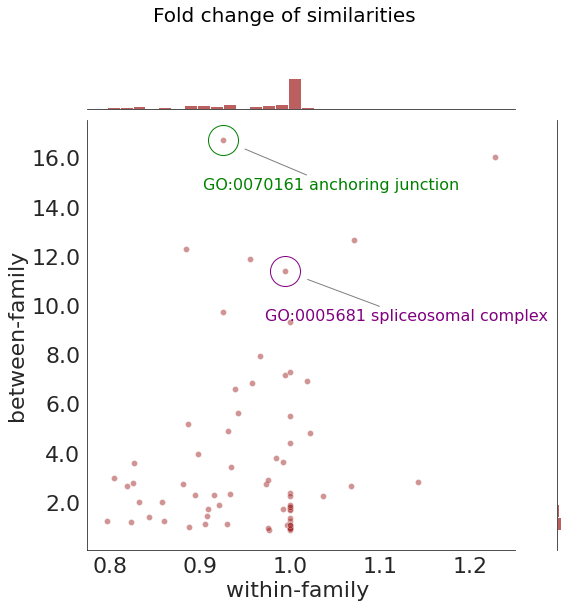

In [18]:
sns_plot = visualization.vis_scatter(vec_within_subtree, vec_between_subtree, label_1 = 'within-family ', label_2 = 'between-family', \
        para_jointplot={ 'color':'brown', 'kind':'scatter', 'alpha':0.5, 'space': 0.7, 'marginal_kws': {'bins': 30}},\
                                     anno_font_size = 22, height = 8, ratio = 10)
index_lst = [48, 8]
color = ['green', 'purple']
for i in range(len(index_lst)):
    index = index_lst[i]
    y_pos, x_pos =  vec_between_subtree[index], vec_within_subtree[index]
    label = list(root_ID)[index] + ' ' + go[list(root_ID)[index]].name
    sns_plot.ax_joint.plot(x_pos, y_pos, 'o', ms=30, mec= color[i] , mfc='none', mew=1)
    sns_plot.ax_joint.annotate(label, xy = (x_pos, y_pos), xytext = (-20, -50),
   textcoords='offset points',
   color=color[i], size=16,
   arrowprops=dict(
      arrowstyle='-',
      facecolor='black', shrinkB=20 * 1.2, alpha = 0.5)
   )
sns_plot.fig.suptitle('Fold change of similarities', y = 1.05, fontsize = 20, ha = 'center')
sns_plot.fig.tight_layout()

$~$

$~$

In [19]:
vis_lst = []
for i in range(len(nt.layer_ns)+1):
    vis_temp = vis_GO_CC_ImmuneSig.iloc[:,(i*2+1):(i*2+3)]
    vis_temp.columns = ['umap1', 'umap2']
    vis_temp['membership'] = [None for i in range(vis_GO_CC_ImmuneSig.shape[0])]
    vis_lst.append(vis_temp)

col = vis_GO_CC_ImmuneSig['Gene.set.color']
title_lst = ['Jaccard', 'resident memory T cell', 'naive T cell', \
             'natural killer cell', 'alveolar macrophage', 'memory B cell']

In [20]:
### indices for 'GO:0044291','GO:0030057','GO:0014704'; the indices may not be fixed 
nb_lst = np.array([6, 2, 1])+1
### 'GO:0071006', 'GO:0071012', 'GO:0071014'
nb_lst_second = np.array([9, 4, 10]) + 1
### positions for these target gene sets; may need to be adjusted depending on the indices
### 14704: (-80, -70), 44291: (-15, -50), 30057: (30, -15)
xy_lst = [None]*2 + [(-15, -50)]+[(30, -15)]+ [None]*3 + [(-80, -70)] + [None]*4
xy_lst = [xy_lst]*6
### 71012: (30,40) in l1,l2; (30,60) in l4 
### 71014: (30,0), (40,0),(60,0) in l1, l2, l4, 
### 71006: (-60,30), (-80, 30), (-80, 60) in l1, l2, l4
l1 = [None]*5 + [(30, 40)] + [None]*4 +  [(-60, 30), (30, 0)]
l2 = [None]*5 + [(30, 40)] + [None]*4 +  [(-80, 30), (40, 0)] 
l4 = [None]*5 + [(30, 60)] + [None]*4 +  [(-80, 60), (60, 0)] 
xy_lst_second = [l1] + [l2] + [l1] + [l4] + [l1]*2

The display_feature should be a list of colors ...


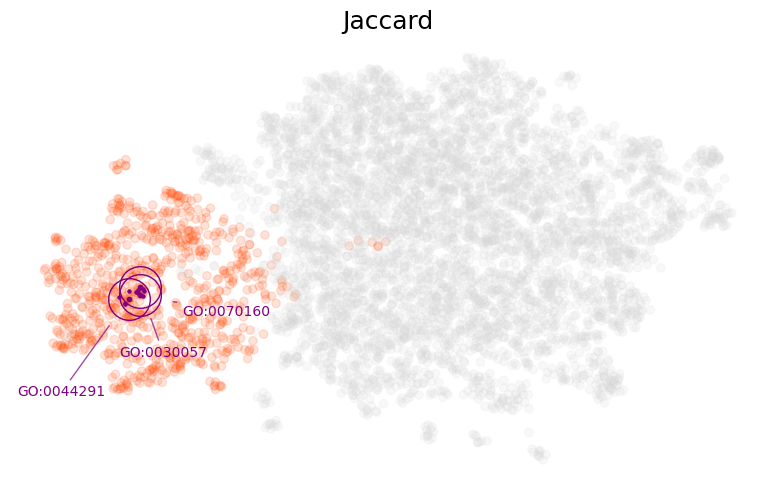

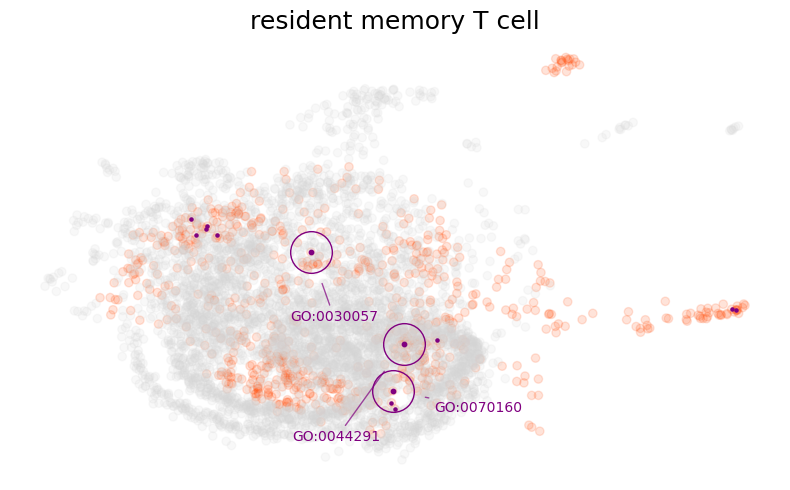

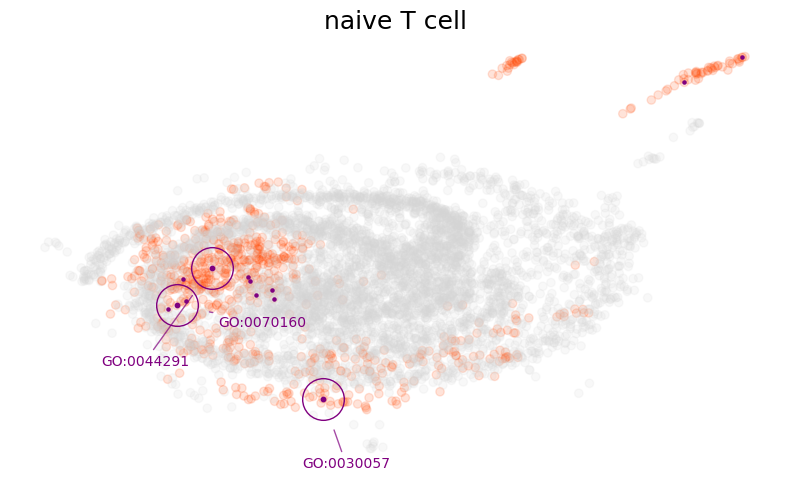

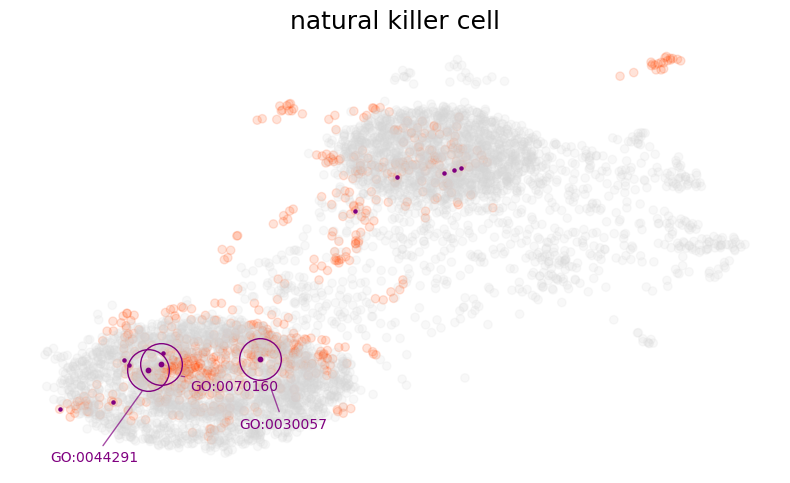

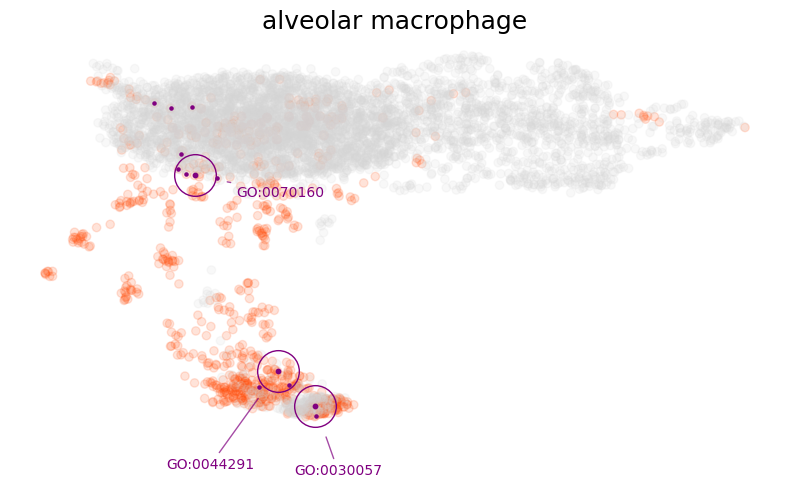

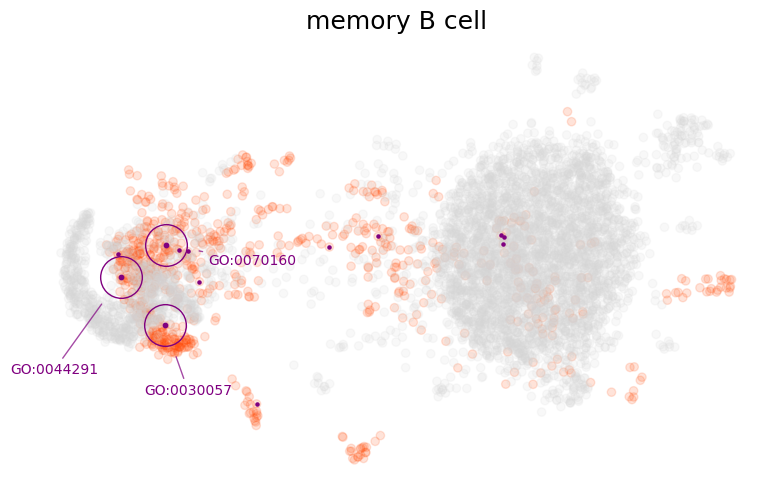

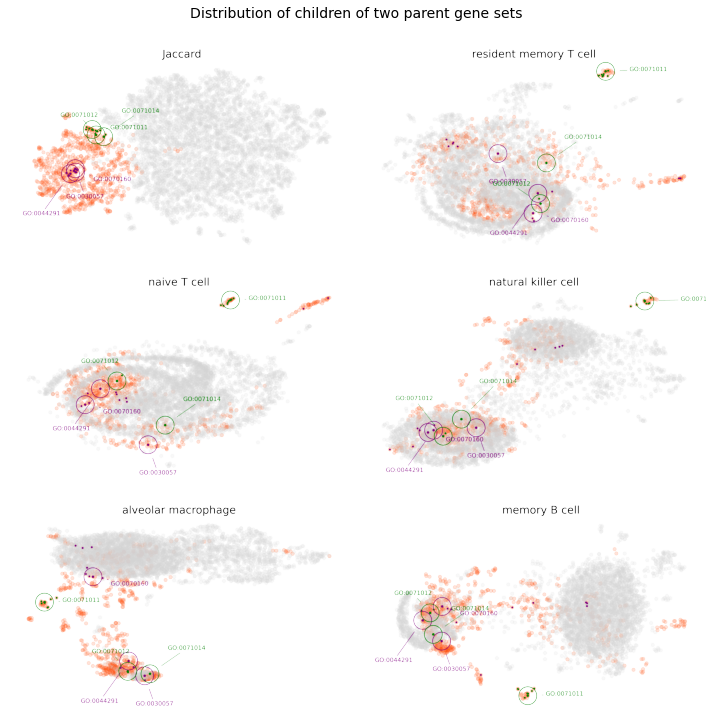

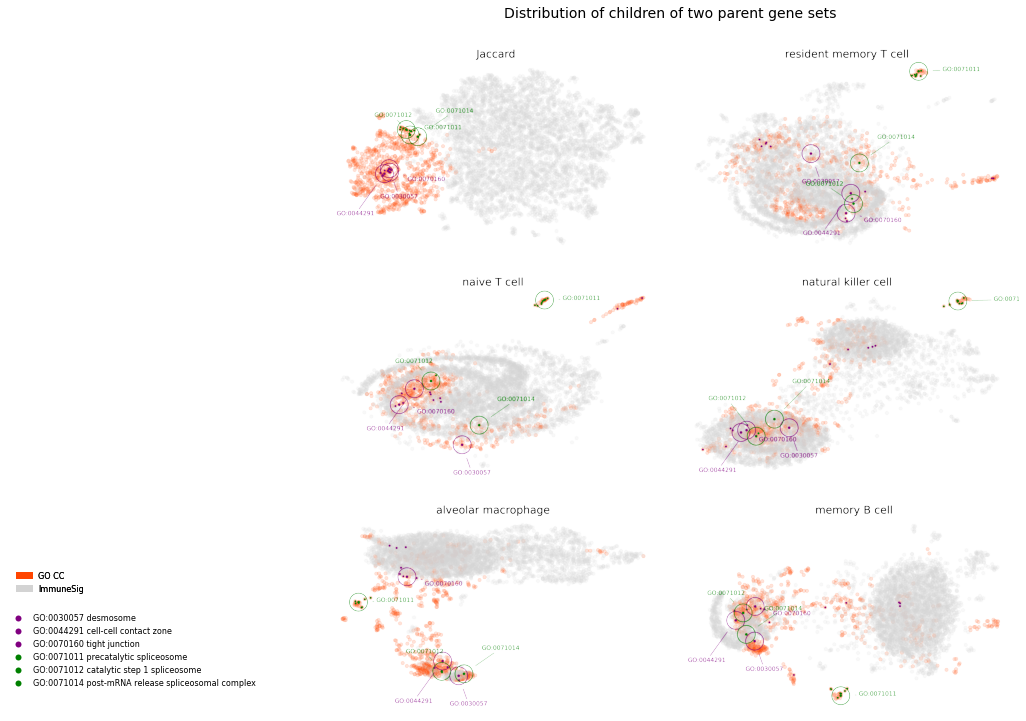

In [21]:
### first family of gene sets
node = go[list(root_ID)[index_lst[0]]]
children = list((node.get_all_children()).intersection(set(vis_GO_CC_ImmuneSig['ID'])))
pos_lst = [np.where(node.id == vis_GO_CC_ImmuneSig['ID'])[0][0]] + [np.where(item == vis_GO_CC_ImmuneSig['ID'])[0][0] for item in children]
Index = {key:pos for key,pos in zip([node.id] + children, pos_lst)}
df_annotate = func.annotation_table(Index, vis_GO_CC_ImmuneSig.iloc[:,1:], sep = '_', num_layer = 6, nb_lst = nb_lst,  position_only = True, first_col = True)
### second family of gene sets
node_second = go[list(root_ID)[index_lst[1]]]
children_second = list((node_second.get_all_children()).intersection(set(vis_GO_CC_ImmuneSig['ID'])))
pos_lst_second = [np.where(node_second.id == vis_GO_CC_ImmuneSig['ID'])[0][0]] + [np.where(item == vis_GO_CC_ImmuneSig['ID'])[0][0] for item in children_second]
Index_second = {key:pos for key,pos in zip([node_second.id] + children_second, pos_lst_second)}
df_annotate_second = func.annotation_table(Index_second, vis_GO_CC_ImmuneSig.iloc[:,1:], sep = '_', num_layer = 6, nb_lst = nb_lst_second ,  position_only = True, first_col = True)

fig_lst, _ = visualization.vis_multiplex_network(nt, UMAP_coord = vis_lst, annotate_df = df_annotate, annotate_kw_lst = None, title_lst = title_lst, title_size = 18, display_feature = [col for i in range(6)], \
            circle = True,  circle_kw = {'target_lst':nb_lst, 'annotate_kw':{'xytext_lst' : xy_lst, 'textcoords':'offset points',
            'color':'purple', 'size':10, 'arrowprops':dict(arrowstyle='-', facecolor='purple', edgecolor = 'purple', shrinkB=20 * 1.2, alpha = 0.7)}},            
            para_vis_UMAP = { 'para_UMAP': {'random_state':321, 'n_neighbors':15, 'min_dist':0.6}, \
             'para_plot' : {'figsize':
                            (8,5), 'dpi':100, 'cmap':'Spectral', 'alpha':0.15}, 
             'colorbar_kw' : {'colorbar':False, 'anchor':(0, 0.4), 'location':'right'} })

_ = visualization.add_annotation_fig_lst(fig_lst = fig_lst, annotate_kw_lst = None, df_annotate = df_annotate_second, circle = True,
             circle_kw = {'target_lst':nb_lst_second, 'annotate_kw':{'xytext_lst':xy_lst_second, 'textcoords':'offset points',
                   'color':'green', 'size':10, 'arrowprops':dict(arrowstyle='-', facecolor='green', edgecolor = 'green', shrinkB=20 * 1.2, alpha = 0.5)}})

for i in range(len(fig_lst)):
    fig_lst[i].savefig(f'temp/vis_hierachy_{i}.png', dpi = 300)

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=3)
for r in range(3):
    for c in range(2):
        ax = fig.add_subplot(spec[r, c])
        ax.imshow(plt.imread(f'temp/vis_hierachy_{r*2+c}.png'))
        ax.axis('off')
            
fig.suptitle('Distribution of children of two parent gene sets', fontsize = 14, y=1)
fig.tight_layout()
plt.show()

label_lst = list(np.unique(df_annotate['marker'][0])[1:4]) + list(np.unique(df_annotate_second['marker'][0])[1:4])
description_lst = [l + ' ' + vis_GO_CC_ImmuneSig['Description'][np.where(l == vis_GO_CC_ImmuneSig['ID'])[0][0]] for l in label_lst]
color_lst = ['purple'] *3 + ['green'] *3
handle_lst = []
for c, l in zip(color_lst, description_lst):
    handle_lst += [Line2D([0], [0], marker='o', label=l,
                        markerfacecolor=c, markersize = 6,\
                          linewidth = 0, markeredgewidth = 0)]
GO_CC_patch = mpatches.Patch(color='orangered', label='GO CC')
ImmuneSig_patch = mpatches.Patch(color='lightgrey', label='ImmuneSig')
ax = fig.gca()
legend = ax.legend(handles = handle_lst, frameon = False,\
                   bbox_to_anchor = (1.8- 3, 3-2.5), fontsize = 8,\
                   labelspacing = 0.5)
ax.add_artist(legend)
legend = ax.legend(handles = [GO_CC_patch, ImmuneSig_patch], frameon = False,\
                   bbox_to_anchor = (1.3- 3, 3.2-2.5), fontsize = 8,\
                   labelspacing = 0.5)
ax.add_artist(legend)
fig